# Задача 1
Дан текстовый файл с одной строкой, в которой без пробелов идут названия химических элементов, необходимо получить список всех элементов (название каждого элемента начинается с большой буквы).

In [11]:
%%writefile input.txt
TiNOHeLi

Overwriting input.txt


In [12]:
import re

with open("input.txt") as file:
    chem_elems = re.findall(r"[A-Z]{1}[a-z]*", file.read())

print(chem_elems)

['Ti', 'N', 'O', 'He', 'Li']


In [13]:
with open("input.txt") as file:
    text = file.read()

chem_elems = []
processed_chars = text[0]
for i in range(1, len(text)):
    if text[i].isupper() or i == len(text) - 1:
        chem_elems.append(processed_chars)
        processed_chars = ''
    processed_chars += text[i]

print(chem_elems)

['Ti', 'N', 'O', 'He', 'Li']


# Задача 2
Найти все текстовые файлы в директории и слить все тексты в один файл.

In [2]:
import os

path_dir = "test"
os.chdir(path_dir)
list_files = os.listdir()

texts = []
for filename in list_files:
    if filename.endswith(".txt"):
        with open(filename) as file:
            texts.append(file.read())

with open("output.txt", "w") as file:
    file.write("\n".join(texts))

print(list_files)

['example2.txt', 'example.txt']


# Задача 3
Для заданного текста закодировать каждый символ двоичным кодом его номера в алфавите.

In [2]:
import string

alphabet = list(string.printable)


chars = []
with open("example3.txt") as file:
    for char in file.read():
        chars.append(bin(alphabet.index(char)))

with open("encoded_text.txt", "w") as file:
    file.write("".join(chars))

# Задача 4
Декодировать текст из предыдущей задачи.

In [3]:
import re

with open("encoded_text.txt") as file:
    text = file.read()

chars = re.split("0b", text[2:])
print(chars)

['101100', '11101', '1000100', '11100', '1011110', '1101', '1110', '1100', '11000', '1101', '1110', '1101', '1011110', '10101', '10010', '10111', '1110', '1001011']


In [7]:
oct(8)

'0o10'

In [4]:
decoded_text = ""
for char in chars:
    decoded_text += alphabet[int(char, base=2)]

print(decoded_text)

It's decoded line.


In [6]:
print("".join(list(map(lambda x: alphabet[int(x, base=2)], chars))))

It's decoded line.


# Задача 5
Для заданного текста ("Алиса в стране чудес") подсчитать частоту встречаемости каждого слова и построить график, где каждая точка показывает частоту слова в тексте, сами слова должны быть отсортированы по убыванию частоты.

['the', 'and', 'to', 'a', 'of', 'she', 'said', 'it', 'Alice', 'in', 'was', 'you', 'I', 'as', 'her', 'that', 'at', 'had', 'on', 'with', 'all', 'be', 'for', 'very', 'little', '`I', 'not', 'so', 'out', 'but', 'they', 'this', 'he', 'down', 'his', 'about', 'up', 'The', 'what', 'one', 'went', 'were', 'is', 'herself', 'like', 'could', 'have', 'them', 'thought', 'would']


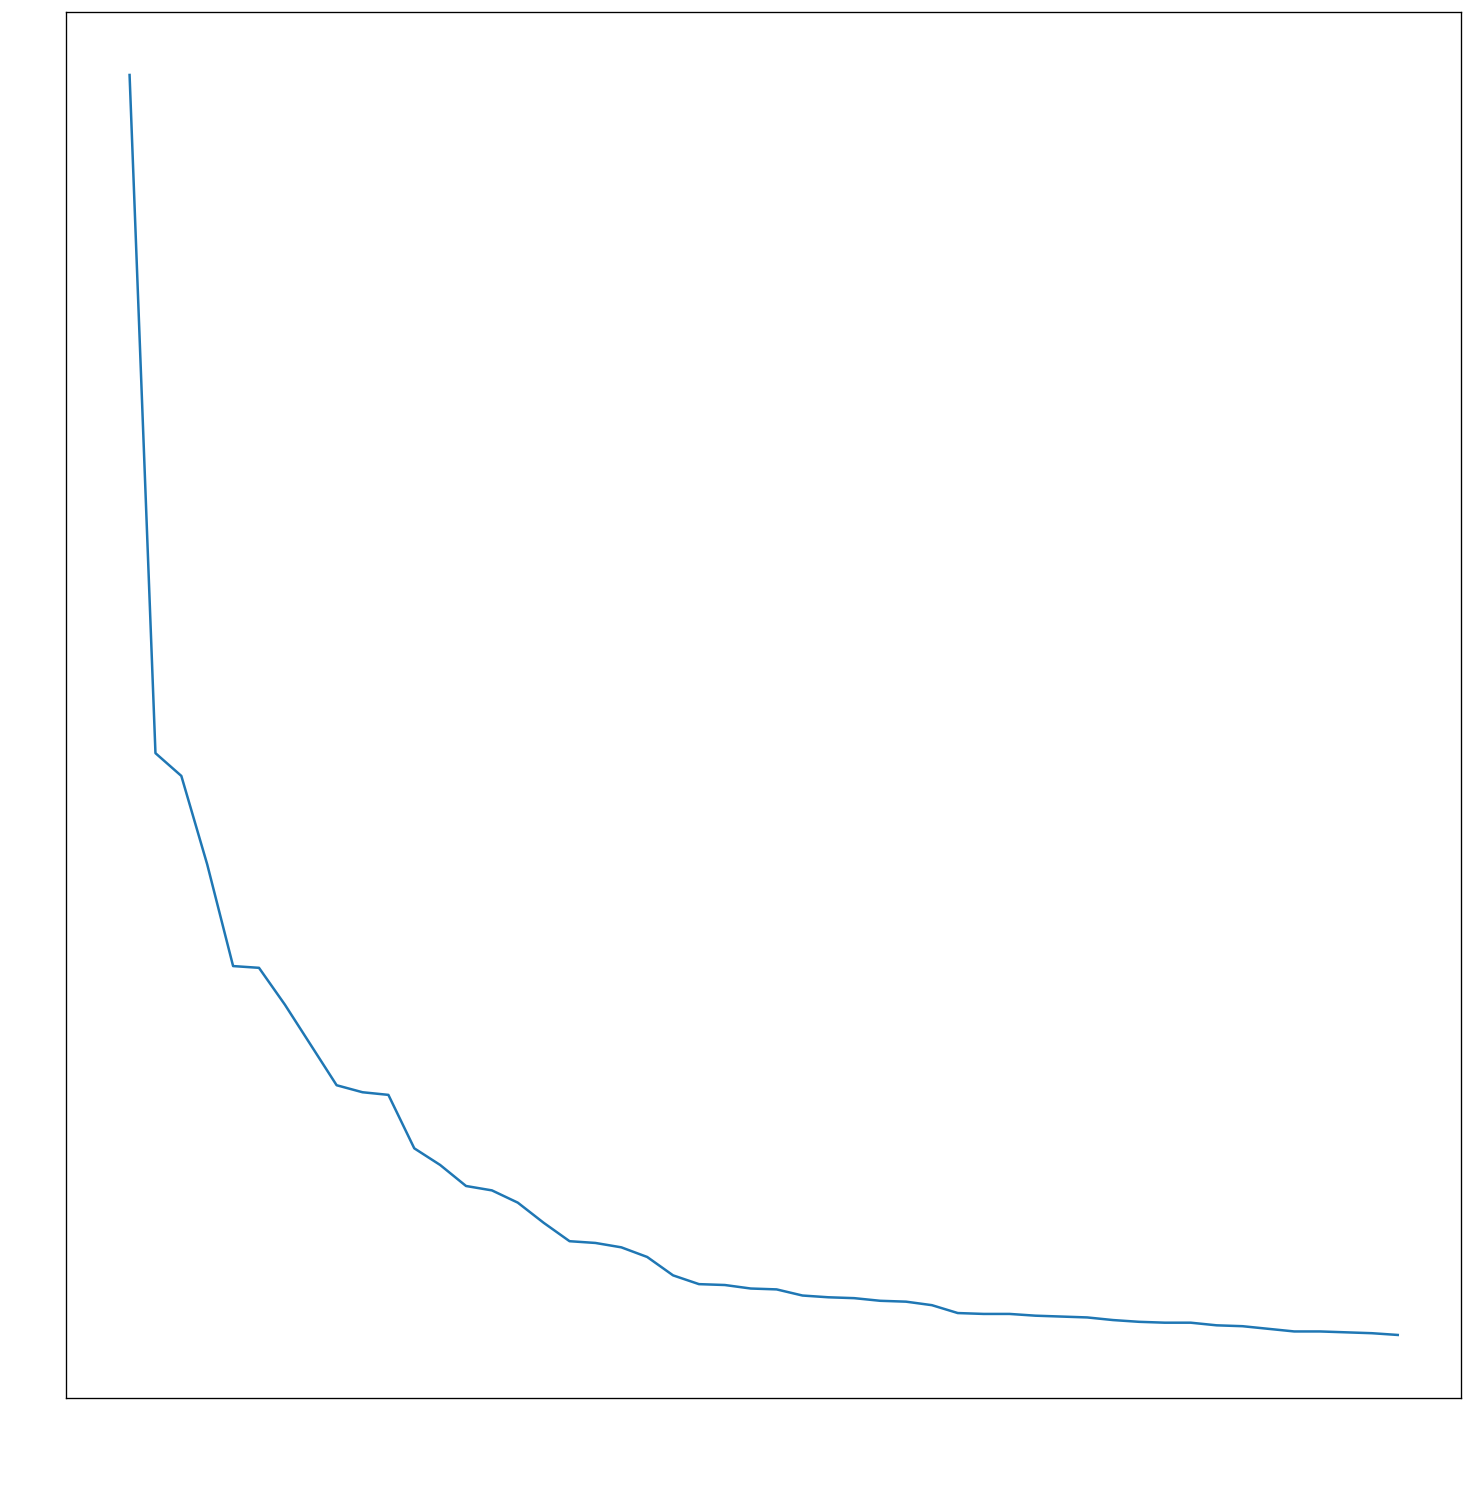

In [4]:
import re
from matplotlib import pyplot as plt
from collections import Counter

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

def preprocess(text):
    return re.sub(r"[0-9,.?!]+", "", text)

def freq_count(text, n=100):
    return Counter(text.split()).most_common(n)

with open("data/11-0.txt") as file:
    text = preprocess(file.read())
    most_commons = freq_count(text, n=50)


x, y = list(map(list, zip(*most_commons)))


print(x)
plt.figure(figsize=(15, 15), dpi=120)
plt.tick_params(axis='x', rotation=90)
plt.plot(x, y)
plt.show()